In [1]:
# Import necessary packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter

In [2]:
# Import the datasets

dfCollege = pd.read_csv('final-college-data.csv')
dfNBA = pd.read_csv('final-nba-data.csv')
dfCombined = pd.read_csv('final-college-nba-data.csv')
dfDraftClass = pd.read_csv('final-draft-class-data.csv')

In [3]:
# Preview the NBA dataset

dfNBA.head()

,Player,FG%,2P%,3P%,FT%,TS%,eFG%,PTS/G
0,Jayson Tatum,47.5,49.2,43.4,82.6,58.6,53.8,13.9
1,Donovan Mitchell,43.7,50.2,34.0,80.5,54.1,50.6,20.5
2,Kyle Kuzma,45.0,51.1,36.6,70.7,54.9,52.7,16.1
3,Josh Hart,46.9,55.1,39.6,70.2,59.6,57.3,7.9
4,Lauri Markkanen,43.4,49.7,36.2,84.3,55.2,51.8,15.2


In [4]:
# Preview the college dataset

dfCollege.head()

,Player,FG%,2P%,3P%,FT%,TS%,eFG%,3PAr,FTr,PTS/G
0,Jayson Tatum,45.2,50.4,34.2,84.9,56.6,50.7,32.1,38.1,16.8
1,Donovan Mitchell,41.8,49.7,32.9,78.8,53.2,49.5,47.0,26.0,11.7
2,Kyle Kuzma,50.6,56.7,30.2,63.3,56.0,54.1,23.0,36.7,10.1
3,Josh Hart,51.1,59.2,38.9,72.0,61.4,58.9,40.1,37.7,13.2
4,Lauri Markkanen,49.2,54.5,42.3,83.5,63.5,58.4,43.4,43.6,15.6


In [5]:
# Preview the total dataset to be used for the regression

dfCombined.head()

,Player,FG%-Col,2P%-Col,3P%-Col,FT%-Col,TS%-Col,eFG%-Col,3PAr-Col,FTr-Col,PTS/G-Col,FG%-NBA,2P%-NBA,3P%-NBA,FT%-NBA,TS%-NBA,eFG%-NBA,PTS/G-NBA
0,Jayson Tatum,45.2,50.4,34.2,84.9,56.6,50.7,32.1,38.1,16.8,47.5,49.2,43.4,82.6,58.6,53.8,13.9
1,Donovan Mitchell,41.8,49.7,32.9,78.8,53.2,49.5,47.0,26.0,11.7,43.7,50.2,34.0,80.5,54.1,50.6,20.5
2,Kyle Kuzma,50.6,56.7,30.2,63.3,56.0,54.1,23.0,36.7,10.1,45.0,51.1,36.6,70.7,54.9,52.7,16.1
3,Josh Hart,51.1,59.2,38.9,72.0,61.4,58.9,40.1,37.7,13.2,46.9,55.1,39.6,70.2,59.6,57.3,7.9
4,Lauri Markkanen,49.2,54.5,42.3,83.5,63.5,58.4,43.4,43.6,15.6,43.4,49.7,36.2,84.3,55.2,51.8,15.2


In [6]:
# Preview the draft class dataset

dfDraftClass.head()

,Player,FG%,2P%,3P%,FT%,TS%,eFG%,3PAr,FTr,PTS/G
0,Jaren Jackson Jr.,51.3,59.6,39.6,79.7,64.7,59.5,41.4,57.3,10.9
1,Miles Bridges,47.0,53.7,37.5,77.6,57.6,54.8,41.3,24.5,17.0
2,Mikal Bridges,52.5,64.5,40.0,84.5,65.6,62.3,49.0,30.4,11.3
3,Trae Young,42.2,49.3,36.0,86.1,58.5,51.8,53.1,44.3,27.4
4,Collin Sexton,44.7,49.5,33.6,77.8,56.7,49.8,29.9,57.5,19.2


Wingspan and DWS: slope = 0.05255842847389852 , intercept = 34.54459689359026 , r_value = 0.07262253333729618 , p_value = 0.6275984507557476 , std_err = 0.10760103464816079


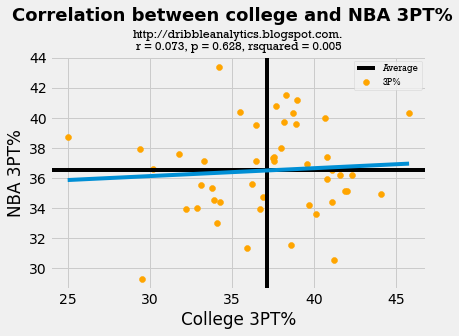

In [7]:
# Let's look at the basic correlation between college 3pt% and NBA 3p5%

plt.style.use('fivethirtyeight')
 
collegenba3pt, ax = plt.subplots()

ax.scatter(dfCollege['3P%'], dfNBA['3P%'], color = 'orange')
ax.axvline(x = np.mean(dfCollege['3P%']), color = 'black')
ax.axhline(y = np.mean(dfNBA['3P%']), label = "Average", color = 'black')
collegenba3pt.suptitle("Correlation between college and NBA 3PT%", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College 3PT%")
ax.set_ylabel("NBA 3PT%")
 
ax.plot(np.unique(dfCollege['3P%']), np.poly1d(np.polyfit(dfCollege['3P%'], dfNBA['3P%'], 1))(np.unique(dfCollege['3P%'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfCollege['3P%'], dfNBA['3P%'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
collegenba3pt.savefig('college-nba-3pt.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 0.08729596140470307 , intercept = 10.265208367247274 , r_value = 0.07608997284309729 , p_value = 0.611216431499745 , std_err = 0.17052953148131383


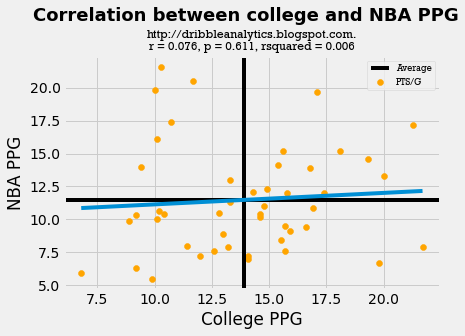

In [8]:
# Let's look at the basic correlation between college PPG and NBA PPG

plt.style.use('fivethirtyeight')
 
collegenbaPPG, ax = plt.subplots()

ax.scatter(dfCollege['PTS/G'], dfNBA['PTS/G'], color = 'orange')
ax.axvline(x = np.mean(dfCollege['PTS/G']), color = 'black')
ax.axhline(y = np.mean(dfNBA['PTS/G']), label = "Average", color = 'black')
collegenbaPPG.suptitle("Correlation between college and NBA PPG", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("College PPG")
ax.set_ylabel("NBA PPG")
 
ax.plot(np.unique(dfCollege['PTS/G']), np.poly1d(np.polyfit(dfCollege['PTS/G'], dfNBA['PTS/G'], 1))(np.unique(dfCollege['PTS/G'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfCollege['PTS/G'], dfNBA['PTS/G'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsqaured = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsqaured, 3))

ax.set_title("http://dribbleanalytics.blogspot.com.\n%s"%rpString, size = 12, fontname = 'Rockwell')
collegenbaPPG.savefig('college-nba-ppg.png', dpi = 400, bbox_inches = 'tight')

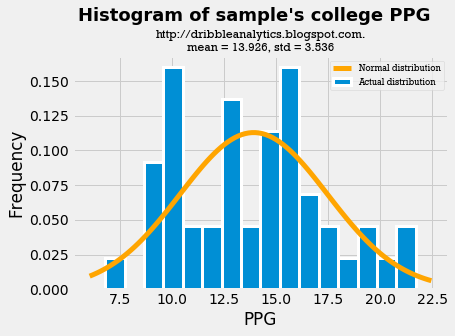

In [9]:
# Let's look at some histograms for seeing how common each statistic is among our players. First up is college ppg

plt.style.use('fivethirtyeight')
collegePpgHist, ax = plt.subplots()

ax.hist(dfCollege['PTS/G'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
collegePpgHist.suptitle("Histogram of sample's college PPG", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("PPG")
ax.set_ylabel("Frequency")

overall_mean = dfCollege['PTS/G'].mean()
overall_std = dfCollege['PTS/G'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

collegePpgHist.savefig('college-ppg-hist.png', dpi = 400, bbox_inches = 'tight')

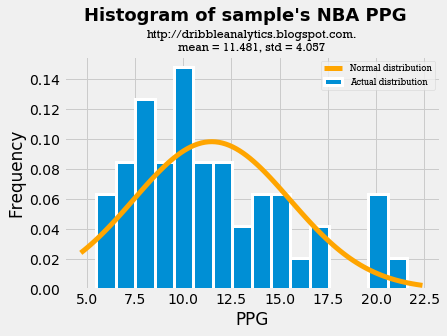

In [10]:
# Let's look at NBA ppg

plt.style.use('fivethirtyeight')
nbaPpgHist, ax = plt.subplots()

ax.hist(dfNBA['PTS/G'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
nbaPpgHist.suptitle("Histogram of sample's NBA PPG", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("PPG")
ax.set_ylabel("Frequency")

overall_mean = dfNBA['PTS/G'].mean()
overall_std = dfNBA['PTS/G'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

nbaPpgHist.savefig('nba-ppg-hist.png', dpi = 400, bbox_inches = 'tight')

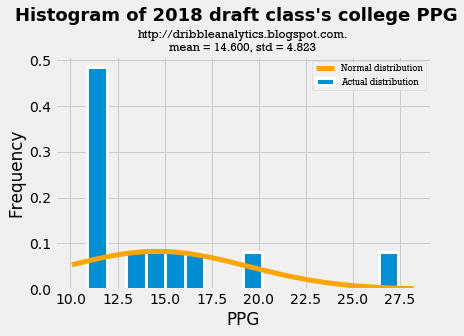

In [11]:
# Let's look at the draft class's ppg

plt.style.use('fivethirtyeight')
draftClassPpgHist, ax = plt.subplots()

ax.hist(dfDraftClass['PTS/G'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
draftClassPpgHist.suptitle("Histogram of 2018 draft class's college PPG", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("PPG")
ax.set_ylabel("Frequency")

overall_mean = dfDraftClass['PTS/G'].mean()
overall_std = dfDraftClass['PTS/G'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

draftClassPpgHist.savefig('draft-class-ppg-hist.png', dpi = 400, bbox_inches = 'tight')

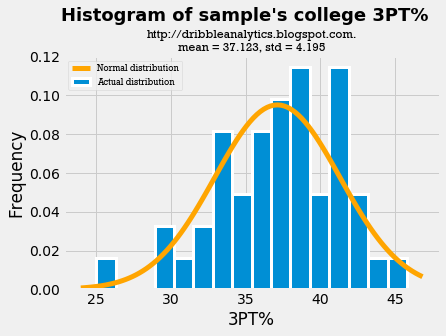

In [12]:
# Let's look at college 3pt%

plt.style.use('fivethirtyeight')
college3ptHist, ax = plt.subplots()

ax.hist(dfCollege['3P%'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")

college3ptHist.suptitle("Histogram of sample's college 3PT%", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("3PT%")
ax.set_ylabel("Frequency")

overall_mean = dfCollege['3P%'].mean()
overall_std = dfCollege['3P%'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

college3ptHist.savefig('college-3pt-hist.png', dpi = 400, bbox_inches = 'tight')

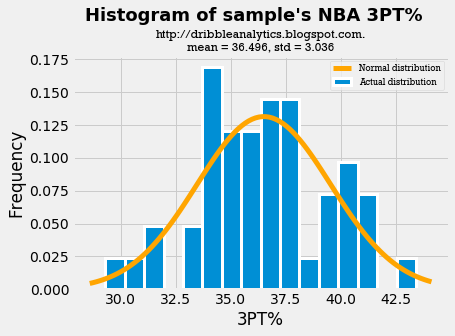

In [13]:
# Let's look at NBA 3pt%

plt.style.use('fivethirtyeight')
nba3ptHist, ax = plt.subplots()

ax.hist(dfNBA['3P%'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
nba3ptHist.suptitle("Histogram of sample's NBA 3PT%", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("3PT%")
ax.set_ylabel("Frequency")

overall_mean = dfNBA['3P%'].mean()
overall_std = dfNBA['3P%'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

nba3ptHist.savefig('nba-3pt-hist.png', dpi = 400, bbox_inches = 'tight')

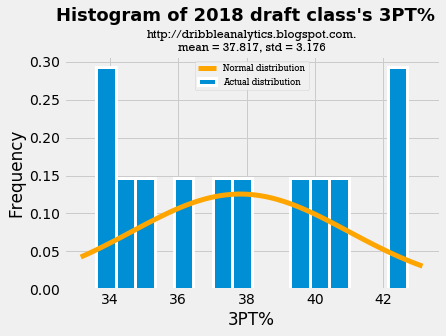

In [14]:
# Let's look at the draft class's 3pt%

plt.style.use('fivethirtyeight')
draftClass3ptHist, ax = plt.subplots()

ax.hist(dfDraftClass['3P%'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")

draftClass3ptHist.suptitle("Histogram of 2018 draft class's 3PT%", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("3PT%")
ax.set_ylabel("Frequency")

overall_mean = dfDraftClass['3P%'].mean()
overall_std = dfDraftClass['3P%'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

draftClass3ptHist.savefig('draft-class-3pt-hist.png', dpi = 400, bbox_inches = 'tight')

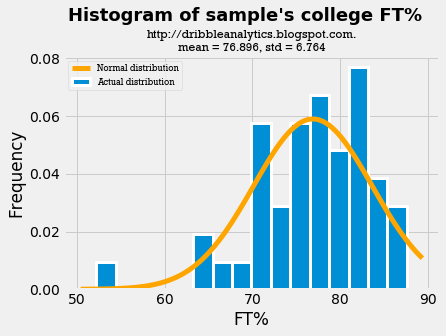

In [15]:
# Let's look at college ft%

plt.style.use('fivethirtyeight')
collegeFtHist, ax = plt.subplots()

ax.hist(dfCollege['FT%'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
collegeFtHist.suptitle("Histogram of sample's college FT%", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("FT%")
ax.set_ylabel("Frequency")

overall_mean = dfCollege['FT%'].mean()
overall_std = dfCollege['FT%'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

collegeFtHist.savefig('college-ft-hist.png', dpi = 400, bbox_inches = 'tight')

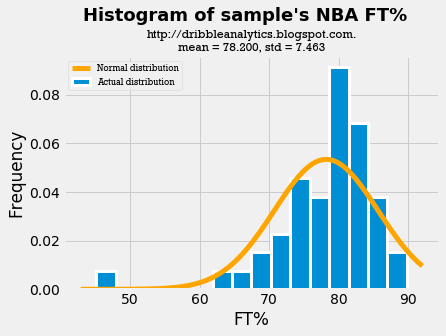

In [16]:
# Let's look at NBA ft%

plt.style.use('fivethirtyeight')
nbaFtHist, ax = plt.subplots()

ax.hist(dfNBA['FT%'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
nbaFtHist.suptitle("Histogram of sample's NBA FT%", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("FT%")
ax.set_ylabel("Frequency")

overall_mean = dfNBA['FT%'].mean()
overall_std = dfNBA['FT%'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

nbaFtHist.savefig('nba-ft-hist.png', dpi = 400, bbox_inches = 'tight')

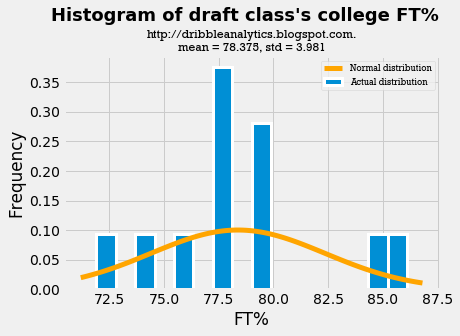

In [17]:
# Let's look at the draft class's ft%

plt.style.use('fivethirtyeight')
draftClassFtHist, ax = plt.subplots()

ax.hist(dfDraftClass['FT%'], bins = 16, edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
draftClassFtHist.suptitle("Histogram of draft class's college FT%", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("FT%")
ax.set_ylabel("Frequency")

overall_mean = dfDraftClass['FT%'].mean()
overall_std = dfDraftClass['FT%'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='orange', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
ax.set_title("http://dribbleanalytics.blogspot.com.\nmean = %.3f, std = %.3f"%(overall_mean, overall_std), size = 12, fontname = 'Rockwell')

draftClassFtHist.savefig('draft-class-ft-hist.png', dpi = 400, bbox_inches = 'tight')

In [18]:
# Create the train and test set

train, test = train_test_split(dfCombined, test_size=0.2, random_state=99)
 
xtrain = train[['FG%-Col', '2P%-Col', '3P%-Col', 'FT%-Col', 'TS%-Col', 'eFG%-Col', '3PAr-Col', 'FTr-Col', 'PTS/G-Col']]
ytrain = train[['PTS/G-NBA']]
 
xtest = test[['FG%-Col', '2P%-Col', '3P%-Col', 'FT%-Col', 'TS%-Col', 'eFG%-Col', '3PAr-Col', 'FTr-Col', 'PTS/G-Col']]
ytest = test[['PTS/G-NBA']]

In [19]:
# Create a linear regression model and test its accuracy

linReg = linear_model.LinearRegression()
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print(y_predLin - ytest)

print('Coefficients: \n', linReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

    PTS/G-NBA
21   1.757244
28   4.650422
11  -4.018636
36  -3.844219
19  -3.279839
26  -0.088668
16  -0.524918
27   1.755372
33   0.891488
32  -4.762401
Coefficients: 
 [[-1.80020571  0.24841191 -0.40018673  0.13665431 -0.0160936   1.50436687
  -0.42240605 -0.05410363  0.19231265]]
Mean squared error: 9.324
Variance score: 0.541


In [20]:
# Let's try a ridge regression

ridgeReg = linear_model.Ridge(alpha = .1)

ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print(y_predRidge - ytest)

print('Coefficients: \n', ridgeReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

    PTS/G-NBA
21   1.845361
28   4.899437
11  -3.983949
36  -3.775077
19  -3.716477
26  -0.125825
16  -0.558794
27   1.622555
33   0.900300
32  -4.672278
Coefficients: 
 [[-1.34635425  0.21671887 -0.34562527  0.11141108  0.13817695  0.9769829
  -0.34117034 -0.06922023  0.19560426]]
Mean squared error: 9.695
Variance score: 0.523


In [21]:
# Let's try a support vector regression instead

svr_rbf = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_rbf = svr_rbf.predict(xtest)

print(y_rbf - ytest['PTS/G-NBA'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rbf))
print('Variance score: %.3f' % r2_score(ytest, y_rbf))

21    1.113579
28    0.516297
11   -3.329242
36   -0.910261
19   -6.568038
26    3.997110
16   -1.209359
27    1.048757
33    0.461001
32   -2.823704
Name: PTS/G-NBA, dtype: float64
Mean squared error: 8.328
Variance score: 0.590


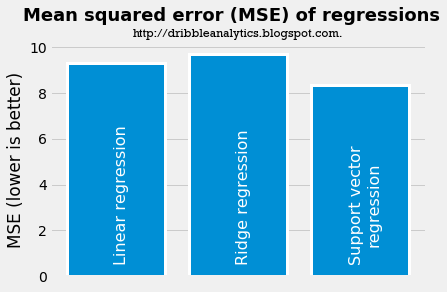

In [22]:
# Let's graph the mean squared error of all three models

msePlot, ax = plt.subplots()

mseScores = [mean_squared_error(ytest, y_predLin), mean_squared_error(ytest, y_predRidge), mean_squared_error(ytest, y_rbf)]
x_pos = np.arange(len(mseScores))

ax.bar(x_pos, mseScores, edgecolor = 'white', linewidth = 3)

mseNames = ["Linear regression", "Ridge regression", "Support vector\nregression"]

labels = [i for i in mseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

msePlot.suptitle("Mean squared error (MSE) of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("MSE (lower is better)")

msePlot.savefig('mse-plot.png', dpi = 400, bbox_inches = 'tight')

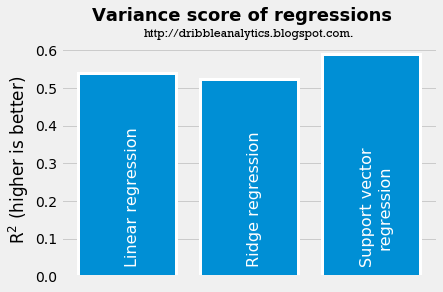

In [23]:
# Let's graph the variance score of all three models

r2plot, ax = plt.subplots()

r2scores = [r2_score(ytest, y_predLin), r2_score(ytest, y_predRidge), r2_score(ytest, y_rbf)]
x_pos = np.arange(len(r2scores))

ax.bar(x_pos, r2scores, edgecolor = 'white', linewidth = 3)

r2names = ["Linear regression", "Ridge regression", "Support vector\nregression"]

labels = [i for i in r2names]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

r2plot.suptitle("Variance score of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel(r"R$^{\rm 2}$ (higher is better)")

r2plot.savefig('r2-plot.png', dpi = 400, bbox_inches = 'tight')

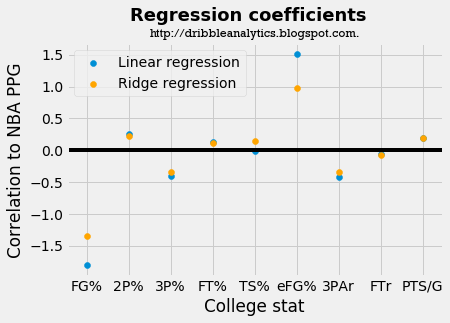

In [33]:
# Let's plot the coefficients

linearCoef = linReg.coef_
ridgeCoef = ridgeReg.coef_

linearCoefPlot = []
ridgeCoefPlot = []

for i in linearCoef[0]:
    linearCoefPlot.append(i)

for i in ridgeCoef[0]:
    ridgeCoefPlot.append(i)   

x_lin = np.arange(len(linearCoefPlot))
x_ridge = np.arange(len(ridgeCoefPlot))

coefPlot, ax = plt.subplots()

ax.scatter(x_lin, linearCoefPlot, label = "Linear regression")
ax.scatter(x_ridge, ridgeCoefPlot, color = 'orange', label = "Ridge regression")

ax.set_xticklabels(['FG%', '2P%', '3P%', 'FT%', 'TS%', 'eFG%', '3PAr', 'FTr', 'PTS/G'])
ax.set_xticks(x_lin)
ax.axhline(y = 0, color = 'black')

ax.set_ylabel("Correlation to NBA PPG")
ax.set_xlabel("College stat")
coefPlot.suptitle("Regression coefficients", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')

ax.legend(loc = 'best')

coefPlot.savefig('coefficient-plot.png', dpi = 400, bbox_inches = 'tight')

In [25]:
# Let's see what the linear model predicts for this draft class

draftClassTest = dfDraftClass.loc[:, 'FG%': 'PTS/G']

linear_draftClass = linReg.predict(draftClassTest)

names = dfDraftClass.iloc[:, 0]

for i, j in zip(linear_draftClass, names):
    print(i, j)

[9.66730797] Jaren Jackson Jr.
[12.52966728] Miles Bridges
[11.73991511] Mikal Bridges
[13.25630738] Trae Young
[13.16061647] Collin Sexton
[12.41570113] Kevin Knox
[10.24820918] Lonnie Walker IV
[12.44118621] Keita Bates-Diop
[9.94876422] Jacob Evans
[9.10584631] Shake Milton
[10.04215483] Aaron Holiday
[10.30609012] Khyri Thomas


In [26]:
# Let's see what the ridge regression predicts for this draft class

ridge_draftClass = ridgeReg.predict(draftClassTest)

for i, j in zip(ridge_draftClass, names):
    print(i, j)

[9.62982775] Jaren Jackson Jr.
[12.55721014] Miles Bridges
[11.67993093] Mikal Bridges
[13.36290376] Trae Young
[13.13995626] Collin Sexton
[12.4462349] Kevin Knox
[10.31676949] Lonnie Walker IV
[12.46855698] Keita Bates-Diop
[9.9447386] Jacob Evans
[9.06961881] Shake Milton
[10.06233446] Aaron Holiday
[10.4393642] Khyri Thomas


In [27]:
# Let's see what the support vector regression predicts for this draft class

svr_draftClass = svr_rbf.predict(draftClassTest)

for i, j in zip(svr_draftClass, names):
    print(i, j)

15.467116074330445 Jaren Jackson Jr.
14.0391454227133 Miles Bridges
10.70155909046927 Mikal Bridges
7.958180154137035 Trae Young
20.234946199883783 Collin Sexton
11.343427285210634 Kevin Knox
12.587554341517386 Lonnie Walker IV
11.552961738742663 Keita Bates-Diop
10.526048067319874 Jacob Evans
9.596661849139775 Shake Milton
11.305384291034652 Aaron Holiday
13.15708205079002 Khyri Thomas


[['Trae Young', 13.25630737705693], ['Collin Sexton', 13.160616465283242], ['Miles Bridges', 12.529667275336227], ['Keita Bates-Diop', 12.441186212726283], ['Kevin Knox', 12.415701128975462], ['Mikal Bridges', 11.739915110040517], ['Khyri Thomas', 10.306090117846558], ['Lonnie Walker IV', 10.248209184543708], ['Aaron Holiday', 10.042154830428485], ['Jacob Evans', 9.948764215955908], ['Jaren Jackson Jr.', 9.667307969841959], ['Shake Milton', 9.105846310839532]]


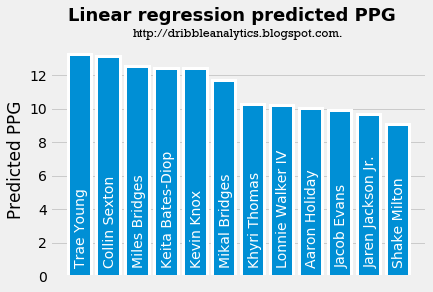

In [28]:
# Let's plot the linear regression predictions

plt.style.use('fivethirtyeight')
linRegPredictions, ax = plt.subplots()

linearPlot = []

for i in linear_draftClass:
    linearPlot.append(float(i))
    
combinedLinear = [[i, j] for i, j in zip(names, linearPlot)]

sortedLinear = sorted(combinedLinear, key = itemgetter(1), reverse = True)
print(sortedLinear)

sortedLinearData = [row[1] for row in sortedLinear]
x_pos = np.arange(len(sortedLinearData))

ax.bar(x_pos, sortedLinearData, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedLinear]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')

linRegPredictions.suptitle("Linear regression predicted PPG", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted PPG")

linRegPredictions.savefig('linear-regression-predictions.png', dpi = 400, bbox_inches = 'tight')

[['Trae Young', 13.362903760235604], ['Collin Sexton', 13.13995625818074], ['Miles Bridges', 12.5572101447482], ['Keita Bates-Diop', 12.46855697693729], ['Kevin Knox', 12.44623489813797], ['Mikal Bridges', 11.679930929481976], ['Khyri Thomas', 10.439364202417776], ['Lonnie Walker IV', 10.316769487552484], ['Aaron Holiday', 10.062334464788375], ['Jacob Evans', 9.94473860091126], ['Jaren Jackson Jr.', 9.629827751185555], ['Shake Milton', 9.06961881092205]]


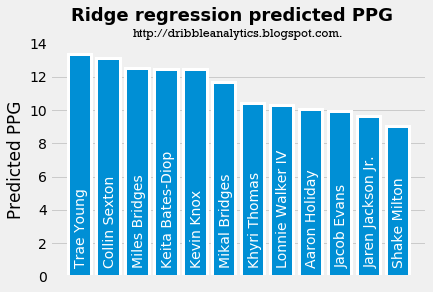

In [29]:
# Let's plot the ridge regression predictions

ridgeRegPredictions, ax = plt.subplots()

ridgePlot = []

for i in ridge_draftClass:
    ridgePlot.append(float(i))
    
combinedRidge = [[i, j] for i, j in zip(names, ridgePlot)]

sortedRidge = sorted(combinedRidge, key = itemgetter(1), reverse = True)
print(sortedRidge)

sortedRidgeData = [row[1] for row in sortedRidge]
x_pos = np.arange(len(sortedRidgeData))

ax.bar(x_pos, sortedRidgeData, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedRidge]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')

ridgeRegPredictions.suptitle("Ridge regression predicted PPG", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted PPG")

ridgeRegPredictions.savefig('ridge-regression-predictions.png', dpi = 400, bbox_inches = 'tight')

[['Collin Sexton', 20.234946199883783], ['Jaren Jackson Jr.', 15.467116074330445], ['Miles Bridges', 14.0391454227133], ['Khyri Thomas', 13.15708205079002], ['Lonnie Walker IV', 12.587554341517386], ['Keita Bates-Diop', 11.552961738742663], ['Kevin Knox', 11.343427285210634], ['Aaron Holiday', 11.305384291034652], ['Mikal Bridges', 10.70155909046927], ['Jacob Evans', 10.526048067319874], ['Shake Milton', 9.596661849139775], ['Trae Young', 7.958180154137035]]


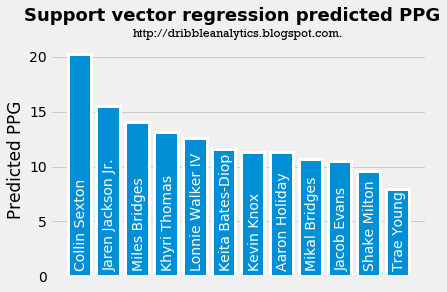

In [30]:
# Let's plot the ridge regression predictions

svrPredictions, ax = plt.subplots()

svrPlot = []

for i in svr_draftClass:
    svrPlot.append(float(i))
    
combinedSVR = [[i, j] for i, j in zip(names, svrPlot)]

sortedSVR = sorted(combinedSVR, key = itemgetter(1), reverse = True)
print(sortedSVR)

sortedSVRdata = [row[1] for row in sortedSVR]
x_pos = np.arange(len(sortedSVRdata))

ax.bar(x_pos, sortedSVRdata, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedSVR]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')

svrPredictions.suptitle("Support vector regression predicted PPG", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted PPG")

svrPredictions.savefig('svr-predictions.png', dpi = 400, bbox_inches = 'tight')

[['Collin Sexton', 15.511839641115921], ['Miles Bridges', 13.042007614265907], ['Keita Bates-Diop', 12.154234976135413], ['Kevin Knox', 12.068454437441355], ['Jaren Jackson Jr.', 11.588083931785988], ['Trae Young', 11.525797097143188], ['Mikal Bridges', 11.373801709997254], ['Khyri Thomas', 11.300845457018118], ['Lonnie Walker IV', 11.050844337871192], ['Aaron Holiday', 10.469957862083836], ['Jacob Evans', 10.139850294729014], ['Shake Milton', 9.257375656967119]]


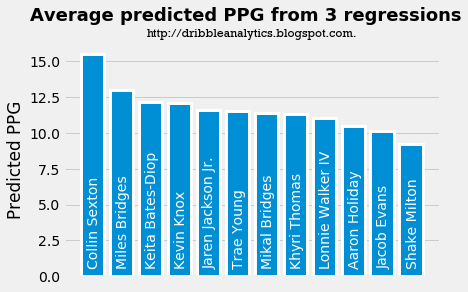

In [31]:
# Let's see who has the highest average ppg among the three models

avgPredictions, ax = plt.subplots()

averagePred = []

for i, j, h in zip(linear_draftClass, ridge_draftClass, svr_draftClass):
    averagePred.append(float((i + j + h) / 3))

combinedAvg = [[i, j] for i, j in zip(names, averagePred)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1), reverse = True)
print(sortedAvg)

sortedAvgData = [row[1] for row in sortedAvg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedAvg]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')

avgPredictions.suptitle("Average predicted PPG from 3 regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("http://dribbleanalytics.blogspot.com.", size = 12, fontname = 'Rockwell')
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted PPG")

avgPredictions.savefig('avg-predictions.png', dpi = 400, bbox_inches = 'tight')